In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
data = pd.read_csv(r'/home/jumashafara/work/dataidea/resources/python_data_analysis/datasets/music.csv')

In [19]:
# How to modify column names
data.rename(columns={
    '  age ': 'age',
    'sex': 'gender'
}, inplace=True)
data.columns

Index(['age', 'gender', 'genre'], dtype='object')

In [44]:
data.describe(include='all')

,age,gender,genre
count,20.000000,20.000000,20
unique,NaN,NaN,5
top,NaN,NaN,Classical
freq,NaN,NaN,8
mean,28.650000,0.550000,NaN
std,5.314083,0.510418,NaN
min,20.000000,0.000000,NaN
25%,25.000000,0.000000,NaN
50%,29.500000,1.000000,NaN
75%,33.250000,1.000000,NaN


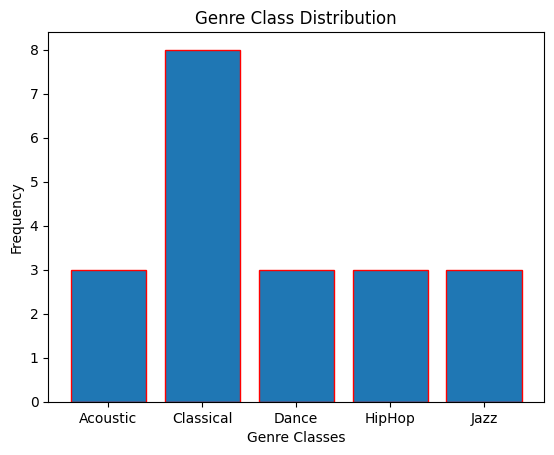

In [38]:
genre_classes = data.groupby(by=['genre']).size().index
genre_values = data.groupby(by=['genre']).size().values

plt.bar(x=genre_classes, height=genre_values, edgecolor='red')
plt.title(label='Genre Class Distribution')
plt.xlabel(xlabel='Genre Classes')
plt.ylabel(ylabel='Frequency')
plt.show()

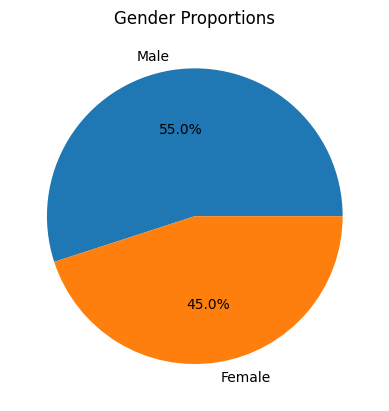

In [43]:
gender_counts = data.gender.value_counts()
plt.pie(x=gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%',)
plt.title(label='Gender Proportions')
plt.show()

In [58]:
data.genre.unique()

array(['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic'], dtype=object)

In [88]:
data2 = pd.get_dummies(data=data, drop_first=True).astype(dtype='int')

In [89]:
data2.head(n=5)

,age,gender,genre_Classical,genre_Dance,genre_HipHop,genre_Jazz
0,20,1,0,0,1,0
1,23,1,0,0,1,0
2,25,1,0,0,1,0
3,26,1,0,0,0,1
4,29,1,0,0,0,1


In [90]:
features = data2.drop('gender', axis=1)
outcome = data2.gender

In [97]:
log_reg_model = LogisticRegression()
dec_tree_classifier = DecisionTreeClassifier()

In [98]:
log_reg_model.fit(X=features, y=outcome)
dec_tree_classifier.fit(X=features, y=outcome)

DecisionTreeClassifier()

In [99]:
features.columns

Index(['age', 'genre_Classical', 'genre_Dance', 'genre_HipHop', 'genre_Jazz'], dtype='object')

In [94]:
prediction = log_reg_model.predict(X=[[20, 0, 0, 0, 0]])

gender = {
    1: 'Male',
    0: 'Female'
}

print(gender[prediction[0]])

Female


/home/jumashafara/venvs/pytorch/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [100]:
prediction = dec_tree_classifier.predict(X=[[20, 0, 0, 0, 0]])

gender = {
    1: 'Male',
    0: 'Female'
}

print(gender[prediction[0]])

Female


/home/jumashafara/venvs/pytorch/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [109]:
log_acc = log_reg_model.score(X=features, y=outcome) * 100
tree_acc = dec_tree_classifier.score(X=features, y=outcome) * 100

print(f'Logistic Regression Model Accuracy: {log_acc}% \n'
      f'Decision Tree Classifier Accuracy: {tree_acc}%')

Logistic Regression Model Accuracy: 80.0% 
Decision Tree Classifier Accuracy: 90.0%
